In [4]:
var openDigger = require('../src/open_digger');

任务1.1
月份: 2015-04
当月新增Star: 89
月份: 2015-05
当月新增Star: 917
月份: 2015-06
当月新增Star: 460
月份: 2015-09
当月新增Star: 1140
月份: 2015-10
当月新增Star: 530
月份: 2015-11
当月新增Star: 1270
月份: 2015-12
当月新增Star: 598
月份: 2016-01
当月新增Star: 1303
月份: 2016-02
当月新增Star: 818
月份: 2016-03
当月新增Star: 1554
月份: 2016-04
当月新增Star: 962
月份: 2016-05
当月新增Star: 1724
月份: 2016-06
当月新增Star: 1068
月份: 2016-07
当月新增Star: 1912
月份: 2016-08
当月新增Star: 1198
月份: 2016-09
当月新增Star: 2016
月份: 2016-10
当月新增Star: 1294
月份: 2016-11
当月新增Star: 2234
月份: 2016-12
当月新增Star: 1460
月份: 2017-01
当月新增Star: 2391
月份: 2017-02
当月新增Star: 1591
月份: 2017-03
当月新增Star: 2543
月份: 2017-04
当月新增Star: 1726
月份: 2017-05
当月新增Star: 2709
月份: 2017-06
当月新增Star: 3355
月份: 2017-07
当月新增Star: 3550
月份: 2017-08
当月新增Star: 3773
月份: 2017-09
当月新增Star: 4082
月份: 2017-10
当月新增Star: 3863
月份: 2017-11
当月新增Star: 4573
月份: 2017-12
当月新增Star: 4366
月份: 2018-01
当月新增Star: 5074
月份: 2018-02
当月新增Star: 4817
月份: 2018-03
当月新增Star: 5371
月份: 2018-04
当月新增Star: 5342
月份: 2018-05
当月新增Star: 5537
月份: 2018-06
当月新增Star: 5803
月份:

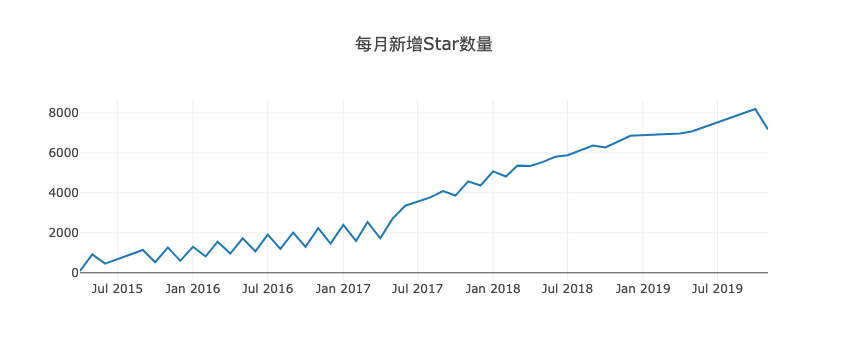

In [86]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.1.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_stargazers_count
    from github_log.events
    where created_at=${year} and repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_stargazers_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 1; i < countArray.length; i++) {
    countArray[i] -= countArray[i - 1]; // count every month add
  }
  for(let i = 0; i < timeArray.length; i++) {
      console.log('年月: ' + timeArray[i]);
      console.log('当月新增Star: ' + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Star个数" });
});


任务1.2
月份: 2015-04
当月新增Fork: 9
月份: 2015-05
当月新增Fork: 38
月份: 2015-06
当月新增Fork: 18
月份: 2015-09
当月新增Fork: 51
月份: 2015-10
当月新增Fork: 25
月份: 2015-11
当月新增Fork: 58
月份: 2015-12
当月新增Fork: 32
月份: 2016-01
当月新增Fork: 64
月份: 2016-02
当月新增Fork: 52
月份: 2016-03
当月新增Fork: 84
月份: 2016-04
当月新增Fork: 65
月份: 2016-05
当月新增Fork: 97
月份: 2016-06
当月新增Fork: 87
月份: 2016-07
当月新增Fork: 104
月份: 2016-08
当月新增Fork: 101
月份: 2016-09
当月新增Fork: 120
月份: 2016-10
当月新增Fork: 107
月份: 2016-11
当月新增Fork: 132
月份: 2016-12
当月新增Fork: 115
月份: 2017-01
当月新增Fork: 147
月份: 2017-02
当月新增Fork: 125
月份: 2017-03
当月新增Fork: 162
月份: 2017-04
当月新增Fork: 131
月份: 2017-05
当月新增Fork: 243
月份: 2017-06
当月新增Fork: 170
月份: 2017-07
当月新增Fork: 337
月份: 2017-08
当月新增Fork: 204
月份: 2017-09
当月新增Fork: 384
月份: 2017-10
当月新增Fork: 212
月份: 2017-11
当月新增Fork: 429
月份: 2017-12
当月新增Fork: 276
月份: 2018-01
当月新增Fork: 458
月份: 2018-02
当月新增Fork: 315
月份: 2018-03
当月新增Fork: 478
月份: 2018-04
当月新增Fork: 370
月份: 2018-05
当月新增Fork: 491
月份: 2018-06
当月新增Fork: 412
月份: 2018-07
当月新增Fork: 510
月份: 2018-09
当月新增Fork

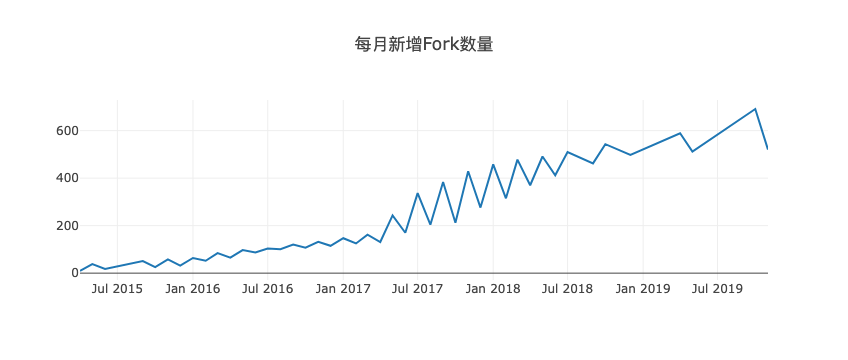

In [88]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.1.2 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, repo_forks_count
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      tmp[data[i][j].created_at.slice(0, 7)] = Number(
        data[i][j].repo_forks_count
      );
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 1; i < countArray.length; i++) {
    countArray[i] -= countArray[i - 1];
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("月份: " + timeArray[i]);
    console.log("当月新增Fork: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月新增Fork数量" });
});


任务2.1
月份: 2015-04
当月打开Issue: 6
月份: 2015-05
当月打开Issue: 19
月份: 2015-06
当月打开Issue: 10
月份: 2015-09
当月打开Issue: 6
月份: 2015-10
当月打开Issue: 16
月份: 2015-11
当月打开Issue: 4
月份: 2015-12
当月打开Issue: 6
月份: 2016-01
当月打开Issue: 4
月份: 2016-02
当月打开Issue: 6
月份: 2016-04
当月打开Issue: 8
月份: 2016-05
当月打开Issue: 8
月份: 2016-06
当月打开Issue: 6
月份: 2016-07
当月打开Issue: 2
月份: 2016-08
当月打开Issue: 4
月份: 2016-09
当月打开Issue: 18
月份: 2016-10
当月打开Issue: 6
月份: 2016-11
当月打开Issue: 4
月份: 2016-12
当月打开Issue: 2
月份: 2017-01
当月打开Issue: 10
月份: 2017-02
当月打开Issue: 10
月份: 2017-03
当月打开Issue: 3
月份: 2017-04
当月打开Issue: 6
月份: 2017-05
当月打开Issue: 10
月份: 2017-06
当月打开Issue: 14
月份: 2017-07
当月打开Issue: 8
月份: 2017-08
当月打开Issue: 5
月份: 2017-09
当月打开Issue: 12
月份: 2017-10
当月打开Issue: 10
月份: 2017-11
当月打开Issue: 12
月份: 2017-12
当月打开Issue: 7
月份: 2018-01
当月打开Issue: 2
月份: 2018-02
当月打开Issue: 6
月份: 2018-03
当月打开Issue: 10
月份: 2018-05
当月打开Issue: 3
月份: 2018-06
当月打开Issue: 2
月份: 2018-07
当月打开Issue: 3
月份: 2018-09
当月打开Issue: 4
月份: 2018-10
当月打开Issue: 5
月份: 2018-12
当月打开Issue: 3
月份: 201

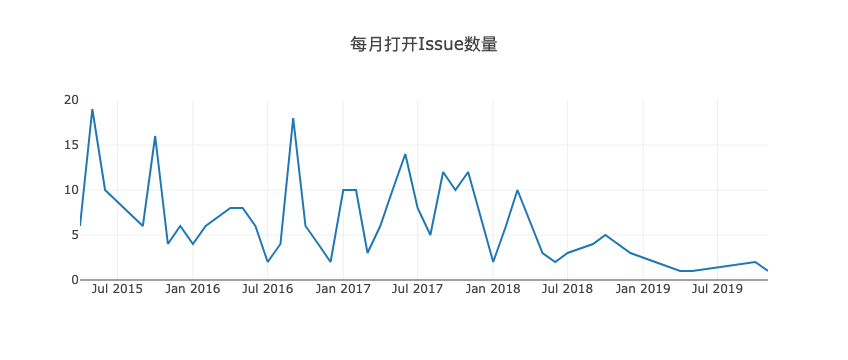

In [89]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.2.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_closed_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'IssuesEvent' and action = 'closed'
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for(let i = 0; i < data.length; i++) {
    for(let j = 0; j < data[i].length; j++) {
      if (tmp.hasOwnProperty(data[i][j].issue_closed_at.slice(0, 7))) {
        tmp[data[i][j].issue_closed_at.slice(0, 7)] += 1;
      } else {
        tmp[data[i][j].issue_closed_at.slice(0, 7)] = 1;
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("年月: " + timeArray[i]);
    console.log("当月关闭Issue个数: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: 'scatter'
    },
  ];
  openDigger.render.plotly(data, {title: '每月关闭Issue个数'});
});

任务2.2
月份: 2015-04
当月关闭Issue: 3
月份: 2015-05
当月关闭Issue: 7
月份: 2015-06
当月关闭Issue: 4
月份: 2015-09
当月关闭Issue: 4
月份: 2015-10
当月关闭Issue: 1
月份: 2015-11
当月关闭Issue: 7
月份: 2015-12
当月关闭Issue: 4
月份: 2016-01
当月关闭Issue: 2
月份: 2016-03
当月关闭Issue: 2
月份: 2016-04
当月关闭Issue: 3
月份: 2016-05
当月关闭Issue: 6
月份: 2016-06
当月关闭Issue: 3
月份: 2016-07
当月关闭Issue: 1
月份: 2016-09
当月关闭Issue: 2
月份: 2016-10
当月关闭Issue: 7
月份: 2016-12
当月关闭Issue: 2
月份: 2017-01
当月关闭Issue: 1
月份: 2017-02
当月关闭Issue: 7
月份: 2017-03
当月关闭Issue: 3
月份: 2017-04
当月关闭Issue: 2
月份: 2017-05
当月关闭Issue: 8
月份: 2017-06
当月关闭Issue: 3
月份: 2017-07
当月关闭Issue: 4
月份: 2017-09
当月关闭Issue: 3
月份: 2017-10
当月关闭Issue: 3
月份: 2017-11
当月关闭Issue: 20
月份: 2017-12
当月关闭Issue: 1
月份: 2018-01
当月关闭Issue: 1
月份: 2018-02
当月关闭Issue: 4
月份: 2018-03
当月关闭Issue: 2
月份: 2018-04
当月关闭Issue: 1
月份: 2018-07
当月关闭Issue: 5
月份: 2018-10
当月关闭Issue: 6
月份: 2018-12
当月关闭Issue: 4


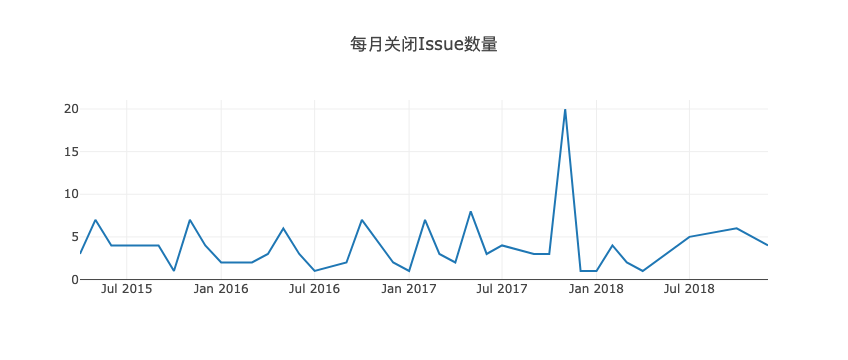

In [90]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.2.2 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'IssuesEvent' and action = 'opened'
    `);
  })
).then((data) => {
  const tmp = {};
  let issumeAverageDuration = 0;
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_created_at.slice(0, 4) !== "1970") { 
        if (tmp.hasOwnProperty(data[i][j].issue_created_at.slice(0, 7))) {
          tmp[data[i][j].issue_created_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].issue_created_at.slice(0, 7)] = 1;
        }
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("年月: " + timeArray[i]);
    console.log("当月关闭Issue个数: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月关闭Issue个数" });
});

任务3.1
月份: 2015-04
当月打开PR: 3
月份: 2015-05
当月打开PR: 10
月份: 2015-06
当月打开PR: 5
月份: 2015-09
当月打开PR: 3
月份: 2015-10
当月打开PR: 8
月份: 2015-11
当月打开PR: 2
月份: 2015-12
当月打开PR: 3
月份: 2016-01
当月打开PR: 2
月份: 2016-02
当月打开PR: 3
月份: 2016-04
当月打开PR: 4
月份: 2016-05
当月打开PR: 4
月份: 2016-06
当月打开PR: 3
月份: 2016-07
当月打开PR: 1
月份: 2016-08
当月打开PR: 2
月份: 2016-09
当月打开PR: 9
月份: 2016-10
当月打开PR: 3
月份: 2016-11
当月打开PR: 2
月份: 2016-12
当月打开PR: 1
月份: 2017-01
当月打开PR: 5
月份: 2017-02
当月打开PR: 5
月份: 2017-03
当月打开PR: 2
月份: 2017-04
当月打开PR: 3
月份: 2017-05
当月打开PR: 5
月份: 2017-06
当月打开PR: 7
月份: 2017-07
当月打开PR: 4
月份: 2017-08
当月打开PR: 3
月份: 2017-09
当月打开PR: 4
月份: 2017-10
当月打开PR: 5
月份: 2017-11
当月打开PR: 6
月份: 2017-12
当月打开PR: 4
月份: 2018-01
当月打开PR: 1
月份: 2018-02
当月打开PR: 3
月份: 2018-03
当月打开PR: 5
月份: 2018-05
当月打开PR: 2
月份: 2018-06
当月打开PR: 1
月份: 2018-07
当月打开PR: 2
月份: 2018-09
当月打开PR: 2
月份: 2018-10
当月打开PR: 3
月份: 2018-12
当月打开PR: 2
月份: 2019-04
当月打开PR: 1
月份: 2019-05
当月打开PR: 1
月份: 2019-10
当月打开PR: 2
月份: 2019-11
当月打开PR: 1


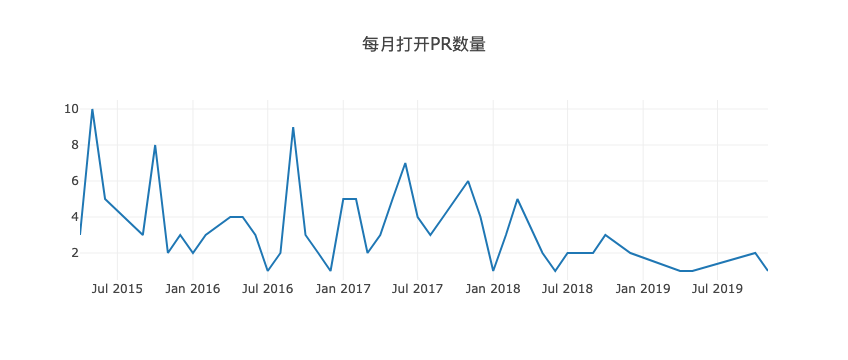

In [91]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.3.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => { // 或者 select pull_created_at
    return query(`
    select created_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
    `);
  })
).then((data) => {
    const tmp = {};
    for (let i = 0; i < data.length; i++) {
      for (let j = 0; j < data[i].length; j++) {
        if (tmp.hasOwnProperty(data[i][j].created_at.slice(0, 7))) {
          tmp[data[i][j].created_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].created_at.slice(0, 7)] = 1;
        }
      }
    }
    const ordered = Object.fromEntries(Object.entries(tmp).sort());
    let timeArray = [];
    let countArray = [];
    for (const key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
    }
    for (let i = 0; i < timeArray.length; i++) {
    console.log("年月: " + timeArray[i]);
    console.log("当月打开PR个数: " + countArray[i]);
  }
    var data = [
      {
        x: timeArray,
        y: countArray,
        type: 'scatter'
      },
    ];
    openDigger.render.plotly(data, {title: '每月打开PR个数'});
});


任务3.2
月份: 2015-04
当月合并PR: 2
月份: 2015-05
当月合并PR: 7
月份: 2015-06
当月合并PR: 1
月份: 2015-09
当月合并PR: 2
月份: 2015-10
当月合并PR: 1
月份: 2015-11
当月合并PR: 5
月份: 2015-12
当月合并PR: 2
月份: 2016-01
当月合并PR: 2
月份: 2016-03
当月合并PR: 1
月份: 2016-04
当月合并PR: 2
月份: 2016-05
当月合并PR: 6
月份: 2016-06
当月合并PR: 3
月份: 2016-07
当月合并PR: 1
月份: 2016-09
当月合并PR: 2
月份: 2016-10
当月合并PR: 7
月份: 2016-12
当月合并PR: 2
月份: 2017-02
当月合并PR: 4
月份: 2017-03
当月合并PR: 3
月份: 2017-04
当月合并PR: 2
月份: 2017-05
当月合并PR: 4
月份: 2017-06
当月合并PR: 1
月份: 2017-07
当月合并PR: 3
月份: 2017-09
当月合并PR: 1
月份: 2017-10
当月合并PR: 2
月份: 2017-11
当月合并PR: 13
月份: 2018-01
当月合并PR: 1
月份: 2018-02
当月合并PR: 3
月份: 2018-03
当月合并PR: 2
月份: 2018-04
当月合并PR: 1
月份: 2018-07
当月合并PR: 3
月份: 2018-10
当月合并PR: 4


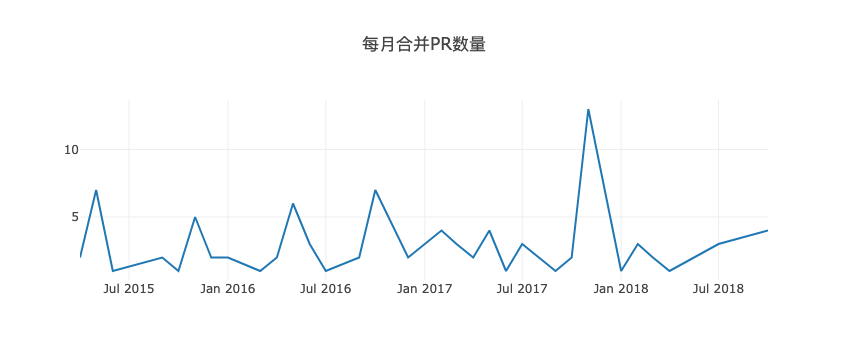

In [95]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log("2.3.2 - - - - - - - - - ");
Promise.all(
  years.map((year) => {
    return query(`
    select pull_merged_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and pull_merged = 1
    `);
  })
).then((data) => {
  const tmp = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].pull_merged_at.slice(0, 4) !== "1970") {
        if (tmp.hasOwnProperty(data[i][j].pull_merged_at.slice(0, 7))) {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] += 1;
        } else {
          tmp[data[i][j].pull_merged_at.slice(0, 7)] = 1;
        }
      }
    }
  }
  const ordered = Object.fromEntries(Object.entries(tmp).sort());
  let timeArray = [];
  let countArray = [];
  for (const key in ordered) {
    timeArray.push(key);
    countArray.push(ordered[key]);
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("年月: " + timeArray[i]);
    console.log("当月合并PR个数: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月合并PR个数" });
});


任务4
月份: 2015-01
当月活跃开发者: 13
月份: 2015-02
当月活跃开发者: 25
月份: 2015-03
当月活跃开发者: 32
月份: 2015-04
当月活跃开发者: 197
月份: 2015-05
当月活跃开发者: 1143
月份: 2015-06
当月活跃开发者: 99
月份: 2015-07
当月活跃开发者: 90
月份: 2015-08
当月活跃开发者: 53
月份: 2015-09
当月活跃开发者: 81
月份: 2015-10
当月活跃开发者: 122
月份: 2015-11
当月活跃开发者: 142
月份: 2015-12
当月活跃开发者: 112
月份: 2016-01
当月活跃开发者: 146
月份: 2016-02
当月活跃开发者: 323
月份: 2016-03
当月活跃开发者: 224
月份: 2016-04
当月活跃开发者: 207
月份: 2016-05
当月活跃开发者: 147
月份: 2016-06
当月活跃开发者: 159
月份: 2016-07
当月活跃开发者: 152
月份: 2016-08
当月活跃开发者: 156
月份: 2016-09
当月活跃开发者: 124
月份: 2016-10
当月活跃开发者: 166
月份: 2016-11
当月活跃开发者: 280
月份: 2016-12
当月活跃开发者: 192
月份: 2017-01
当月活跃开发者: 191
月份: 2017-02
当月活跃开发者: 192
月份: 2017-03
当月活跃开发者: 264
月份: 2017-04
当月活跃开发者: 195
月份: 2017-05
当月活跃开发者: 1591
月份: 2017-06
当月活跃开发者: 843
月份: 2017-07
当月活跃开发者: 498
月份: 2017-08
当月活跃开发者: 590
月份: 2017-09
当月活跃开发者: 523
月份: 2017-10
当月活跃开发者: 547
月份: 2017-11
当月活跃开发者: 609
月份: 2017-12
当月活跃开发者: 503
月份: 2018-01
当月活跃开发者: 521
月份: 2018-02
当月活跃开发者: 391
月份: 2018-03
当月活跃开发者: 506
月份: 2018-04
当月活跃开发者: 364
月

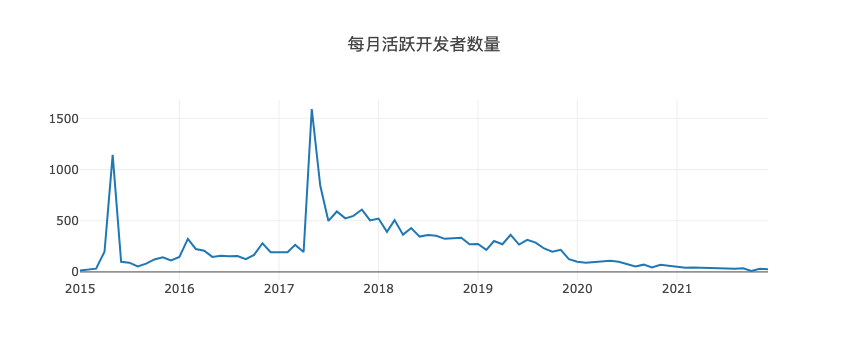

In [92]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.4 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select created_at, actor_id
    from github_log.year${year}
    where repo_id=${repo_id} 
    `);
  })
).then((data) => {
  var tmp = new Map();
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (!tmp.has(data[i][j].created_at.slice(0, 7))) {
        tmp.set(data[i][j].created_at.slice(0, 7), [data[i][j].actor_id]);
      } else {
        tmp.set(data[i][j].created_at.slice(0, 7), [
          data[i][j].actor_id,
          ...tmp.get(data[i][j].created_at.slice(0, 7)),
        ]);
      }
    }
  }
  let timeArray = [];
  let countArray = [];
  const tmpPair = {};
  for (let key of tmp) {
    let tmpCount = new Set(key[1]).size;
    tmpPair[key[0]] = tmpCount;
  }
  const ordered = Object.fromEntries(Object.entries(tmpPair).sort()); // sort by date
  for(let key in ordered) {
      timeArray.push(key);
      countArray.push(ordered[key]);
  }
  for (let i = 0; i < timeArray.length; i++) {
    console.log("年月: " + timeArray[i]);
    console.log("当月活跃开发者个数: " + countArray[i]);
  }
  var data = [
    {
      x: timeArray,
      y: countArray,
      type: "scatter",
    },
  ];
  openDigger.render.plotly(data, { title: "每月活跃开发者个数" });
});


In [96]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.5 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_created_at, issue_closed_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'IssuesEvent' and action = 'closed'
    `);
  })
).then((data) => {
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].issue_closed_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurationArray.push(duration);
      }
    }
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "Issue 从打开到关闭的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "Issue 从打开到关闭的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

任务5
以下结果去除了没有关闭的Issue
Issue 从打开到关闭的平均时长为 64.90天
Issue 从打开到关闭的中位数时长为 2天


In [29]:
// // const fs = require('fs');
// var startYear = 2015,
// endYear = 2022;
// var years = [];
// var repo_id = 24186761;
// var query = openDigger.driver.clickhouse.query;
// for (var y = startYear; y <= endYear; y++) years.push(y);
// console.log('任务6的前序准备');
// Promise.all(
//   years.map((year) => {
//     return query(`
//     select issue_id, created_at
//     from github_log.year${year}
//     where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
//     `);
//   })
// ).then((data) => {
//     // let count = 0;
//     let prOpenDic = {};
//     for(let i = 0; i < data.length; i++) {
//         for(let j = 0; j < data[i].length; j++) {
//             if (data[i][j].created_at.slice(0, 4) !== '1970') {
//                 prOpenDic[data[i][j].issue_id] = data[i][j].created_at;
//                 // count += 1;
//             }
//         }
//     }
//     // console.log(prOpenDic);
//     // console.log(count);
//     const prOpenDicJSON = JSON.stringify(prOpenDic);
//     fs.writeFile('prOpen.json', prOpenDicJSON, (err) => {
//         if (err) {
//             console.log(err);
//         }
//     })
// });

任务6的前序准备


In [28]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.6 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at, pull_merged_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and pull_merged = 1
    `);
  })
).then((data) => {
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].pull_merged_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurationArray.push(duration);
      }
    }
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "PR 从打开到关闭的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "PR 从打开到关闭的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

任务6
PR 从打开到合并的平均时长为 44.78天
PR 从打开到合并的中位数时长为 20天


In [97]:
var startYear = 2015,
  endYear = 2021;
var years = [];
var repo_id = 23141830;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('2.7.1 - - - - - - - - - ');
Promise.all(
  years.map((year) => {
    return query(`
    select issue_title, issue_id, min(issue_comment_created_at) as a, issue_created_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'IssueCommentEvent' and issue_comment_author_id!= issue_author_id
    group by issue_title, issue_id ,issue_created_at
    `);
  })
).then((data) => {
  let issueStarttimeArray = [];
  let issueDurationArray = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_created_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        const duration = Math.round(Math.abs( Date.parse(data[i][j].a.slice(0, 10))  -  Date.parse(data[i][j].issue_created_at.slice(0, 10)) ) / oneDay);
        issueStarttimeArray.push(data[i][j].issue_created_at.slice(0, 10))
        issueDurationArray.push(duration);
      }
    }
  }
  console.log("Issue从打开到第一次有人评论的平均时长为：")
  for (let i = 0; i < issueStarttimeArray.length; i++) {
    console.log(issueStarttimeArray[i] + ": " + issueDurationArray[i])
  }
  issueDurationArray.sort();
  let middleValueOfissueDuration =
    issueDurationArray[Math.floor(issueDurationArray.length / 2)];
  let aveageValueOfissueDuration =
    issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
  console.log(
    "Issue从打开到第一次有人评论的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
  );
  console.log(
    "Issue从打开到第一次有人评论的中位数时长为 " + middleValueOfissueDuration + "天"
  );
});

任务7.1
以下结果去除了没有关闭的Issue
Issue 从打开到第一次被评论的平均时长为 61.94天
Issue 从打开到第一次被评论的中位数时长为 2天


In [32]:
// var startYear = 2015,
//   endYear = 2021;
// var years = [];
// var repo_id = 23141830;
// var query = openDigger.driver.clickhouse.query;
// for (var y = startYear; y <= endYear; y++) years.push(y);
// console.log('2.7.2 - - - - - - - - - ');
// Promise.all(
//   years.map((year) => {
//     return query(`
//     select issue_title, issue_id, min(issue_comment_created_at),issue_created_at ,min(issue_comment_created_at)-issue_created_at as a
//     from github_log.year${year}
//     where repo_id=${repo_id} and type = 'IssueCommentEvent' and issue_comment_author_id!= issue_author_id
//     group by issue_title, issue_id ,issue_created_at
//     `);
//   })
// ).then((data) => {
//   let issueStarttimeArray = [];
//   let issueDurationArray = [];
//   for (let i = 0; i < data.length; i++) {
//     for (let j = 0; j < data[i].length; j++) {
//       if (data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
//         const oneDay = 24 * 60 * 60 * 1000;
//         const duration = Math.round(Math.abs((Date.parse(data[i][j].a.slice(0, 10))) / oneDay));
//         issueStarttimeArray.push(data[i][j].a.slice(0, 10))
//         issueDurationArray.push(duration);
//       }
//     }
//   }
//   console.log("Issue从打开到第一次有人评论的平均时长为：")
//   for (let i = 0; i < issueStarttimeArray.length; i++) {
//     console.log(issueStarttimeArray[i] + ": " + issueDurationArray[i])
//   }
//   issueDurationArray.sort();
//   let middleValueOfissueDuration =
//     issueDurationArray[Math.floor(issueDurationArray.length / 2)];
//   let aveageValueOfissueDuration =
//     issueDurationArray.reduce((a, b) => a + b, 0) / issueDurationArray.length;
//   console.log(
//     "Issue从打开到第一次有人评论的平均时长为 " + aveageValueOfissueDuration.toFixed(2) + "天"
//   );
//   console.log(
//     "Issue从打开到第一次有人评论的中位数时长为 " + middleValueOfissueDuration + "天"
//   );
// });


任务7.2
PR 从打开到第一次被评论的平均时长为 26.73天
PR 从打开到第一次被评论的中位数时长为 181天


In [46]:
// var startYear = 2015,
//   endYear = 2020;
// var years = [];
// var repo_id = 24186761;
// var query = openDigger.driver.clickhouse.query;
// for (var y = startYear; y <= endYear; y++) years.push(y);
// Promise.all(
//   years.map((year) => {
//     return query(`
//     select issue_id, release_published_at
//     from github_log.year${year}
//     where repo_id=${repo_id} 
//     `);
//   })
// ).then((data) => {
//   let count = 0;
//   let releaseDic = {};
//   for (let i = 0; i < data.length; i++) {
//     for (let j = 0; j < data[i].length; j++) {
//       if (data[i][j].release_published_at.slice(0, 4) !== "1970") {
//         count += 1;
//         if (
//           releaseDic.hasOwnProperty(data[i][j].release_published_at.slice(0, 4))
//         ) {
//           releaseDic[data[i][j].release_published_at.slice(0, 4)] += 1;
//         } else {
//           releaseDic[data[i][j].release_published_at.slice(0, 4)] = 1;
//         }
//       }
//     }
//   }
//   console.log("任务8 我们认为项目release发布的次数值得关注");
//   console.log("该项目release发布了 " + count + "次");
//   for (let year in releaseDic) {
//     console.log("其中 " + year + "年发布了 " + releaseDic[year] + "次");
//   }
// });


任务8 我们认为项目release发布的次数值得关注
该项目release发布了 31次
其中 2015年发布了 16次
其中 2016年发布了 4次
其中 2017年发布了 8次
其中 2018年发布了 3次
